In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [135]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [136]:
dataset.columns = ["Sample_code", "Clump_Thickness", "Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape",
                "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin",
                "Normal_Nucleoli", "Mitoses","Class"]
dataset.head()

,Sample_code,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [137]:
dataset.shape

(698, 11)

In [138]:
dataset.isnull().sum()
dataset.isna().sum()

Sample_code                    0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code                  698 non-null    int64 
 1   Clump_Thickness              698 non-null    int64 
 2   Uniformity_of_Cell_Size      698 non-null    int64 
 3   Uniformity_of_Cell_Shape     698 non-null    int64 
 4   Marginal_Adhesion            698 non-null    int64 
 5   Single_Epithelial_Cell_Size  698 non-null    int64 
 6   Bare_Nuclei                  698 non-null    object
 7   Bland_Chromatin              698 non-null    int64 
 8   Normal_Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [64]:
from numpy.lib.arraysetops import unique
columns = dataset.columns
for i in columns:
  print("The unique column names are {} : {}".format(i,dataset[i].is_unique))

The unique column names are Sample_code : False
The unique column names are Clump_Thickness : False
The unique column names are Uniformity_of_Cell_Size : False
The unique column names are Uniformity_of_Cell_Shape : False
The unique column names are Marginal_Adhesion : False
The unique column names are Single_Epithelial_Cell_Size : False
The unique column names are Bare_Nuclei : False
The unique column names are Bland_Chromatin : False
The unique column names are Normal_Nucleoli : False
The unique column names are Mitoses : False
The unique column names are Class : False


In [139]:
dataset = dataset.replace('?',np.NaN)
for i in columns:
  print("The number of missing values are {} : {}".format(i,dataset[i].isna().sum()))

The number of missing values are Sample_code : 0
The number of missing values are Clump_Thickness : 0
The number of missing values are Uniformity_of_Cell_Size : 0
The number of missing values are Uniformity_of_Cell_Shape : 0
The number of missing values are Marginal_Adhesion : 0
The number of missing values are Single_Epithelial_Cell_Size : 0
The number of missing values are Bare_Nuclei : 16
The number of missing values are Bland_Chromatin : 0
The number of missing values are Normal_Nucleoli : 0
The number of missing values are Mitoses : 0
The number of missing values are Class : 0


In [140]:
dataset = dataset.drop(['Sample_code'],axis=1)
dataset

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


In [99]:
dataset1 = dataset['Bare_Nuclei']
print('Before replacing missing values:')
print(dataset1[192:199])
dataset1 = dataset1.fillna(dataset1.median())
print('After replacing missing values:')
print(dataset1[192:199])

Before replacing missing values:
192    1
193    1
194    1
195    7
196    1
197    1
198    1
Name: Bare_Nuclei, dtype: object
After replacing missing values:
192    1
193    1
194    1
195    7
196    1
197    1
198    1
Name: Bare_Nuclei, dtype: object


In [141]:
dataset1 = dataset.drop(['Class'],axis=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


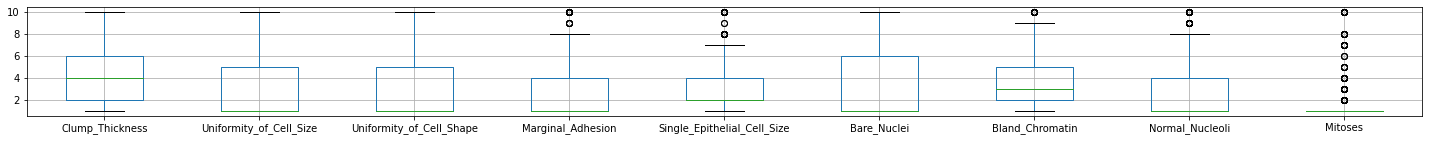

In [142]:
dataset1['Bare_Nuclei'] = pd.to_numeric(dataset1['Bare_Nuclei'])
dataset1.boxplot(figsize=(25,2))

In [143]:
Zscore = (dataset1-dataset1.mean())/dataset1.std()
Zscore[20:25]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
20,1.981456,0.610129,0.601910,0.066703,1.255857,0.946886,1.459640,2.333998,-0.343941
21,-0.502864,-0.700240,-0.743593,-0.633428,-0.549680,-0.699103,-0.589493,-0.611989,-0.343941
22,1.271650,0.282537,0.601910,-0.633428,-0.549680,NaN,1.459640,0.042675,-0.343941
23,-1.212669,-0.700240,-0.743593,-0.633428,-0.549680,-0.699103,-0.179666,-0.611989,-0.343941
24,0.206942,-0.372648,-0.070841,0.416769,-0.549680,0.946886,-0.179666,1.024670,-0.343941


In [144]:
Zscore.shape[0]

698

In [145]:
Zscore1= Zscore.loc[((Zscore > -3).sum(axis=1)==9) & ((Zscore <= 3).sum(axis=1)==9),:]

In [146]:
Zscore1.shape[0]

631

In [147]:
dups = dataset.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 235


In [148]:
dataset1 = dataset.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (dataset1.shape[0]))

Number of rows after discarding duplicates = 463


In [149]:
dataset.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [151]:
dataset['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

In [152]:
X = dataset.drop(columns='Class', axis=1)
Y = dataset['Class']

In [154]:
print(X)


     Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                  5                        4                         4   
1                  3                        1                         1   
2                  6                        8                         8   
3                  4                        1                         1   
4                  8                       10                        10   
..               ...                      ...                       ...   
693                3                        1                         1   
694                2                        1                         1   
695                5                       10                        10   
696                4                        8                         6   
697                4                        8                         8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                    5          

In [155]:
print(Y)

0      2
1      2
2      2
3      2
4      4
      ..
693    2
694    2
695    4
696    4
697    4
Name: Class, Length: 698, dtype: int64
